Explain+cite

Import required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import example 5.2 solution and longitudinal data

In [3]:
example = pd.read_csv('Book1.csv')
dx = example.dx
x = example.x

Define function to solve for friction slope

In [4]:
# create function for friction slope using Manning's equation
def Sfric(k,u,n,r):
    return np.multiply.reduce((u/((k/n)*(r**(2/3))))**2)

Enter input data and calculate initial geometric flow elements

In [5]:
EH = 0.0005
k=1
g=9.81
s0 = 0.001
n=0.025
bedelev = [-x[i]*s0 for i in range(len(x))]
hc = 1.0298
b = 8
m = 2
A1 = hc*(b+(m*hc))
h1 = hc
Q1 = 30
u1 = Q1/A1
H1 = h1+((u1**2)/(2*g))
P1 = b+(2*h1*(1+m**2)**(1/2))
R1 = A1/P1

Initialize arrays

In [6]:
h = np.ones(shape=(len(x),1), dtype=float)
A = np.ones(shape=(len(x), 1), dtype=float)
P = np.ones(shape=(len(x), 1), dtype=float)
R = np.ones(shape=(len(x), 1), dtype=float)
u = np.ones(shape=(len(x), 1), dtype=float)
H = np.ones(shape=(len(x), 1), dtype=float)
Hstar = np.ones(shape=(len(x), 1), dtype=float)
Sbar = np.ones(shape=(len(x), 1), dtype=float)
Hp = np.ones(shape=(len(x), 1), dtype=float)
H1star = np.ones(shape=(len(x), 1), dtype=float)
S1 = np.ones(shape=(len(x), 1), dtype=float)
F1 = np.ones(shape=(len(x), 1), dtype=float)
hstar = np.ones(shape=(len(x), 1), dtype=float)
delh = np.ones(shape=(len(x), 1), dtype=float)
H2 = np.ones(shape=(len(x), 1), dtype=float)

Use Henderson method to solve for h

In [7]:
for i in range(len(x)):
    if i == 0:
        h[i] = h1
        A[i] = A1
        u[i] = u1
        H[i] = H1
        P[i] = P1
        R[i] = R1
    else:
        # step 1
        h[i] = h[i-1]
        absH=1
        H2 = H[i-1]
        S2 = Sfric(k,u[i-1],n,R[i-1])

        while absH > EH:
            # step 2
            A[i] = h[i]*(b+(m*h[i]))

            # calculate velocity
            u[i] = Q1/A[i]

            P[i] = (b+(2*h[i]*(1+m**2)**(1/2))) # for trapezoidal geometry

            R[i] = (A[i]/P[i])

            # step 3
            H[i] = bedelev[i]+h[i]+((u[i]**2)/(2*g)) #total mechanical energy head
            S1[i] = Sfric(k,u[i],n,R[i])

            # step 4 compute average friction slope
            Sbar[i] = S1[i]+S2
            Hp[i] = H2+(0.5*Sbar[i]*dx[i]) #+Hec[i]+Hb[i] # upstream mechanical energy head

            # step 7
            absH = abs(H[i]-Hp[i])
            F1[i] = u[i]/((g*h[i])**.5)
            delh[i] = (H[i]-Hp[i])/(1-(F1[i]**2)+((3*S1[i]*dx[i])/(2*R[i])))
            h[i] = h[i]-delh[i]

Plot calculated vs book solution

Text(0, 0.5, 'Depth (m)')

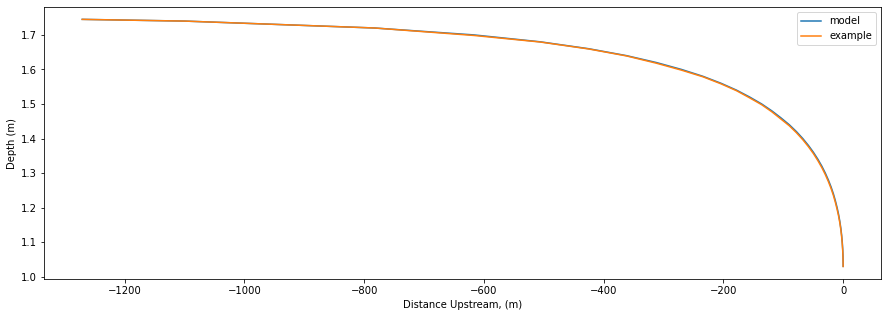

In [14]:
fig = plt.figure(1, figsize=(15,5))
plt.plot(example.x,example.y)
plt.plot(x,h)
plt.legend(['model','example'])
plt.xlabel('Distance Upstream, (m)')
plt.ylabel('Depth (m)')

Calculate residuals and plot

Text(0, 0.5, 'Residual Depth (m)')

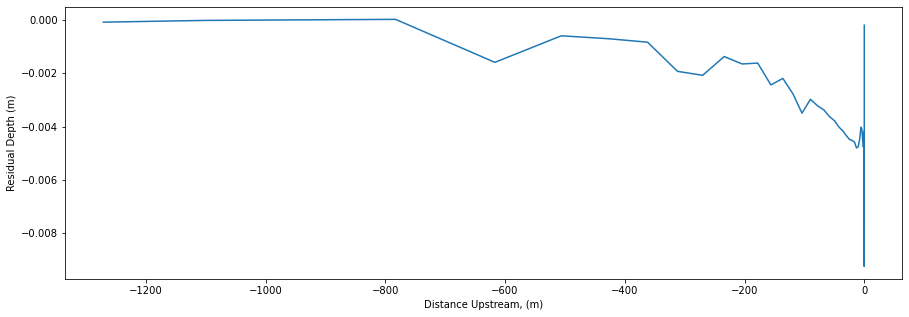

In [15]:
diff = [h[i]-example.y[i] for i in range(len(h))]
fig = plt.figure(1, figsize=(15,5))
plt.plot(x,diff)

plt.xlabel('Distance Upstream, (m)')
plt.ylabel('Residual Depth (m)')